In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

#### loading dataset

In [3]:
df = pd.read_csv("datasets\\pib_per_capita_countries_dataset.csv")
df.head()

,country_code,country_name,region,sub_region,intermediate_region,indicator_code,indicator_name,year,gdp_per_capita,gdp_variation
0,AFG,AFGANISTAN,ASIA MERIDIONAL,SOUTHERN ASIA,NaN,NY.GDP.PCAP.CD,PIB PER CAPITA (US$ A PRECIOS ACTUALES),1960,0.0,0.0
1,AFG,AFGANISTAN,ASIA MERIDIONAL,SOUTHERN ASIA,NaN,NY.GDP.PCAP.CD,PIB PER CAPITA (US$ A PRECIOS ACTUALES),1961,0.0,0.0
2,AFG,AFGANISTAN,ASIA MERIDIONAL,SOUTHERN ASIA,NaN,NY.GDP.PCAP.CD,PIB PER CAPITA (US$ A PRECIOS ACTUALES),1962,0.0,0.0
3,AFG,AFGANISTAN,ASIA MERIDIONAL,SOUTHERN ASIA,NaN,NY.GDP.PCAP.CD,PIB PER CAPITA (US$ A PRECIOS ACTUALES),1963,0.0,0.0
4,AFG,AFGANISTAN,ASIA MERIDIONAL,SOUTHERN ASIA,NaN,NY.GDP.PCAP.CD,PIB PER CAPITA (US$ A PRECIOS ACTUALES),1964,0.0,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13760 entries, 0 to 13759
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   country_code         13760 non-null  object 
 1   country_name         13760 non-null  object 
 2   region               8320 non-null   object 
 3   sub_region           13760 non-null  object 
 4   intermediate_region  5760 non-null   object 
 5   indicator_code       13760 non-null  object 
 6   indicator_name       13760 non-null  object 
 7   year                 13760 non-null  int64  
 8   gdp_per_capita       13760 non-null  float64
 9   gdp_variation        13545 non-null  float64
dtypes: float64(2), int64(1), object(7)
memory usage: 1.0+ MB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,13760.0,1991.500000,18.473624,1960.000000,1975.750000,1991.500000,2007.250000,2.023000e+03
gdp_per_capita,13760.0,7654.829033,17076.866349,0.000000,225.615482,1210.690043,6331.442354,2.565805e+05
gdp_variation,13545.0,7256.965822,844412.457356,-64.423582,0.000000,0.943213,3.816873,9.827525e+07


#### finding missing values

In [6]:
df.isnull().sum()

country_code              0
country_name              0
region                 5440
sub_region                0
intermediate_region    8000
indicator_code            0
indicator_name            0
year                      0
gdp_per_capita            0
gdp_variation           215
dtype: int64

#### finding unique values in columns

In [7]:
df['country_code'].nunique()

215

In [8]:
df['sub_region'].nunique()

17

In [9]:
df['intermediate_region'].unique()

array([nan, 'MIDDLE AFRICA', 'CARIBBEAN', 'SOUTH AMERICA',
       'CENTRAL AMERICA', 'WESTERN AFRICA', 'SOUTHERN AFRICA',
       'EASTERN AFRICA'], dtype=object)

In [10]:
df['region'].unique()

array(['ASIA MERIDIONAL',
       'EUROPA Y ASIA CENTRAL (EXCLUIDO ALTOS INGRESOS)', nan,
       'ÁFRICA AL SUR DEL SAHARA (EXCLUIDO ALTOS INGRESOS)',
       'ORIENTE MEDIO Y NORTE DE ÁFRICA (EXCLUIDO ALTOS INGRESOS)',
       'AMÉRICA LATINA Y EL CARIBE (EXCLUIDO ALTOS INGRESOS)',
       'ASIA ORIENTAL Y EL PACÍFICO (EXCLUIDO ALTOS INGRESOS)'],
      dtype=object)

#### Categorical Encoding

In [11]:
# label_colencoding = ['country_code', 'country_name', 'region', 'sub_region', 'intermediate_region']
# onehot_colendcoding = ['indicator_name', 'indicator_code']
# labelencoders = {}

# for col in label_colencoding:
#     le = LabelEncoder()
#     df[col] = le.fit_transform(df[col])
#     labelencoders[col] = le

In [12]:
dropped_col = df.drop(columns = ['indicator_name','indicator_code'], axis=1, inplace=True)
print(dropped_col)

None


In [13]:
df.head()

,country_code,country_name,region,sub_region,intermediate_region,year,gdp_per_capita,gdp_variation
0,AFG,AFGANISTAN,ASIA MERIDIONAL,SOUTHERN ASIA,NaN,1960,0.0,0.0
1,AFG,AFGANISTAN,ASIA MERIDIONAL,SOUTHERN ASIA,NaN,1961,0.0,0.0
2,AFG,AFGANISTAN,ASIA MERIDIONAL,SOUTHERN ASIA,NaN,1962,0.0,0.0
3,AFG,AFGANISTAN,ASIA MERIDIONAL,SOUTHERN ASIA,NaN,1963,0.0,0.0
4,AFG,AFGANISTAN,ASIA MERIDIONAL,SOUTHERN ASIA,NaN,1964,0.0,0.0


#### for deciding that can we drop columns with missing values or not

In [14]:
# df.corrwith(df['gdp_per_capita']).abs().sort_values()

we can't drop columns `'region'` and `'intermediate_region'` as it has large correlation with outcome variable, so we will use imputation methods

In [15]:
df.head()

,country_code,country_name,region,sub_region,intermediate_region,year,gdp_per_capita,gdp_variation
0,AFG,AFGANISTAN,ASIA MERIDIONAL,SOUTHERN ASIA,NaN,1960,0.0,0.0
1,AFG,AFGANISTAN,ASIA MERIDIONAL,SOUTHERN ASIA,NaN,1961,0.0,0.0
2,AFG,AFGANISTAN,ASIA MERIDIONAL,SOUTHERN ASIA,NaN,1962,0.0,0.0
3,AFG,AFGANISTAN,ASIA MERIDIONAL,SOUTHERN ASIA,NaN,1963,0.0,0.0
4,AFG,AFGANISTAN,ASIA MERIDIONAL,SOUTHERN ASIA,NaN,1964,0.0,0.0


<Axes: xlabel='country_name', ylabel='gdp_per_capita'>

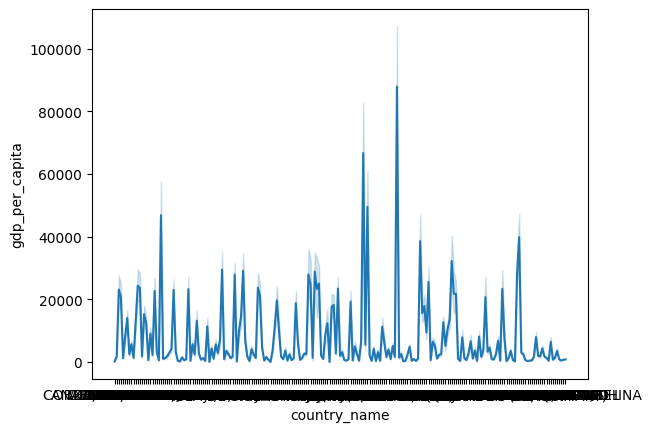

In [16]:
sns.lineplot(df, x='country_name', y='gdp_per_capita')

<Axes: xlabel='country_name', ylabel='gdp_variation'>

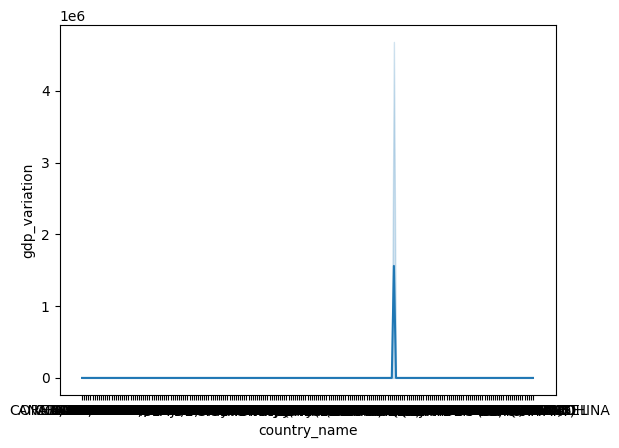

In [17]:
sns.lineplot(df, x='country_name', y='gdp_variation')

<Axes: xlabel='gdp_per_capita', ylabel='Count'>

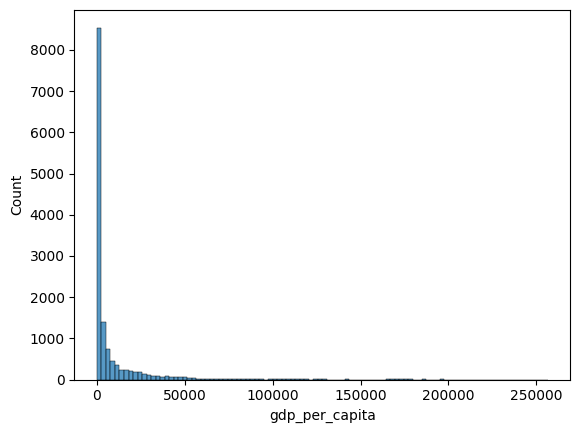

In [18]:
sns.histplot(df, x='gdp_per_capita', bins=100)

### Removing records with 0 values in gdp_per_capita column

Text(0.5, 1.0, 'Boxplot of gdp_per_capita before removing null values')

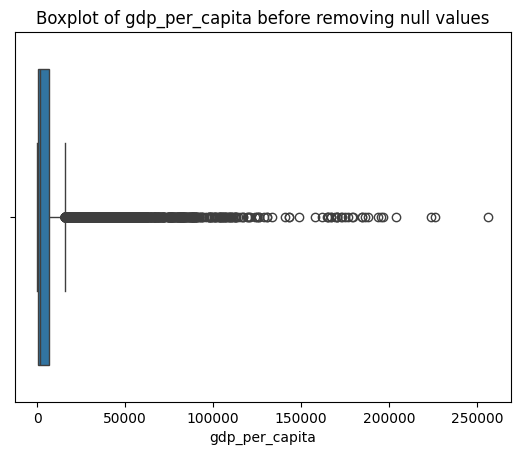

In [19]:
sns.boxplot(df, x='gdp_per_capita')
plt.title("Boxplot of gdp_per_capita before removing null values")

In [20]:
df['gdp_per_capita'].shape

(13760,)

In [21]:
df = df[df['gdp_per_capita'] != 0]

In [22]:
df['gdp_per_capita'].shape

(11320,)

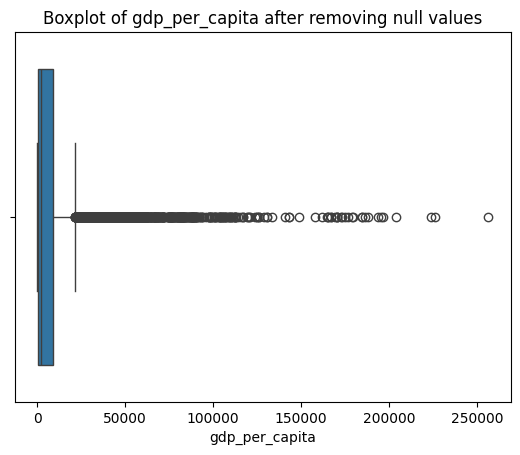

In [23]:
sns.boxplot(df, x='gdp_per_capita')
plt.title("Boxplot of gdp_per_capita after removing null values")
plt.show()

### Top 10 Richest countries

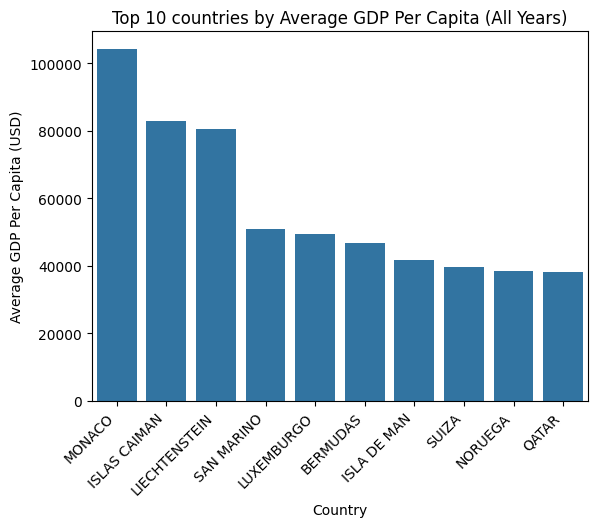

In [24]:
avg_gdp_country = df.groupby('country_name')['gdp_per_capita'].mean().reset_index()
top_10_avg = avg_gdp_country.nlargest(10, 'gdp_per_capita')

sns.barplot(data=top_10_avg, x='country_name', y='gdp_per_capita')
plt.xticks(rotation=45, ha='right')
plt.title("Top 10 countries by Average GDP Per Capita (All Years)")
plt.xlabel("Country")
plt.ylabel("Average GDP Per Capita (USD)")
plt.show()


### Top 10 Poorest countries

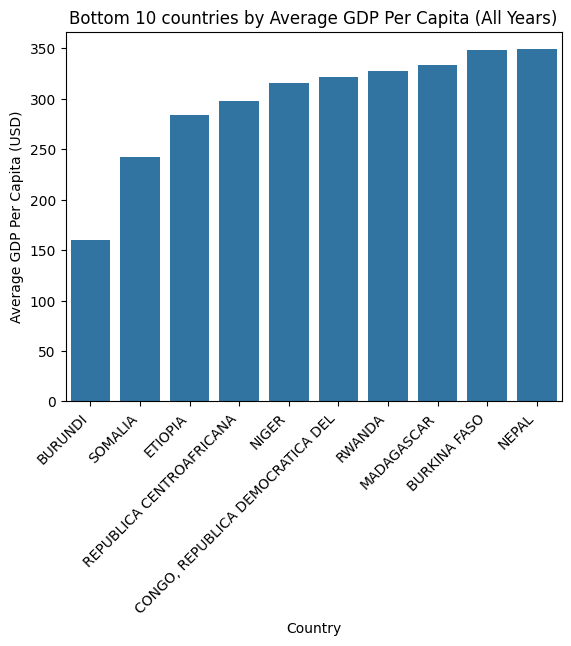

In [25]:
avg_gdp_country = df.groupby('country_name')['gdp_per_capita'].mean().reset_index()
bottom_10_avg = avg_gdp_country.nsmallest(10, 'gdp_per_capita')

sns.barplot(data=bottom_10_avg, x='country_name', y='gdp_per_capita')
plt.xticks(rotation=45, ha='right')
plt.title("Bottom 10 countries by Average GDP Per Capita (All Years)")
plt.xlabel("Country")
plt.ylabel("Average GDP Per Capita (USD)")
plt.show()


### Global Average GDP Per Capita Over the Years

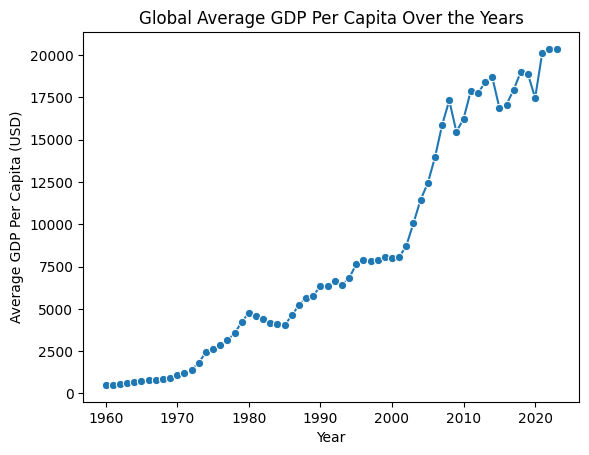

In [26]:
avg_gdp_per_year = df.groupby('year')['gdp_per_capita'].mean().reset_index()

sns.lineplot(data=avg_gdp_per_year, x='year', y='gdp_per_capita', marker='o')
plt.title("Global Average GDP Per Capita Over the Years")
plt.xlabel("Year")
plt.ylabel("Average GDP Per Capita (USD)")
plt.show()


### Highest GDP growth across all years

In [28]:
avg_gdp_variation_per_year = df.groupby('country_name')['gdp_variation'].mean().reset_index()
top_10_gdp_growth = avg_gdp_variation_per_year.nlargest(10, 'gdp_variation')
top_10_gdp_growth

,country_name,gdp_variation
145,OMAN,1.559929e+06
25,BOSNIA Y HERZEGOVINA,6.907296e+00
38,CHINA,6.574798e+00
79,GUINEA ECUATORIAL,5.889611e+00
92,ISLA DE SAN MARTIN (PARTE FRANCESA),5.803273e+00
44,"COREA, REPUBLICA DE",5.764327e+00
116,LITUANIA,5.183732e+00
26,BOTSWANA,4.893546e+00
208,VIET NAM,4.867153e+00
181,SINGAPUR,4.859955e+00


### Lowest GDP growth across all years

In [29]:
avg_gdp_variation_per_year = df.groupby('country_name')['gdp_variation'].mean().reset_index()
bottom_10_gdp_growth = avg_gdp_variation_per_year.nsmallest(10, 'gdp_variation')
bottom_10_gdp_growth

,country_name,gdp_variation
187,SUDAN DEL SUR,-6.986297
137,NAURU,-2.499641
43,"CONGO, REPUBLICA DEMOCRATICA DEL",-1.251211
28,BRUNEI DARUSSALAM,-1.232998
209,"YEMEN, REP. DEL",-1.153246
94,ISLAS CAIMAN,-1.041180
202,UCRANIA,-1.017812
109,KUWAIT,-0.923093
49,CURACAO,-0.884174
119,MADAGASCAR,-0.881925
